In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib import rc
from datetime import datetime, timedelta

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['CMU Serif']
rcParams['text.usetex'] = True

In [2]:
df = pd.read_excel('smap_jundiai_chuva.xlsx')

In [3]:
df

,ETP,P,Qobs,Qplan,idx,P4d,P5d,P6d,P7d,P8d,...,P12d,P13d,P14d,P15d,P30d,P60d,Data,1619.8433333333337,1619.8433333333346,1.0000000000000007
0,5.266667,0.000000,1.69,-0.323000,1,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-01-01,NaN,NaN,NaN
1,5.266667,0.000000,0.06,-0.319765,2,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-01-02,NaN,NaN,NaN
2,5.266667,1.100000,0.41,-0.316562,3,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-01-03,NaN,NaN,NaN
3,5.266667,0.000000,0.06,-0.313391,4,17.800476,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-01-04,NaN,NaN,NaN
4,5.266667,0.000000,1.94,-0.310251,5,0.000000,22.189635,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-01-05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,4.433333,3.740000,3.50,0.449669,361,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-12-27,NaN,NaN,NaN
361,4.433333,2.696667,3.83,0.326139,362,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-12-28,NaN,NaN,NaN
362,4.433333,15.610000,7.14,3.860293,363,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1990-12-29,NaN,NaN,NaN
363,4.433333,6.446667,3.03,2.425178,364,17.800476,0.000000,0.0,31.150833,0.0,...,0.0,57.851548,62.301667,0.0,0.0,0.0,1990-12-30,NaN,NaN,NaN


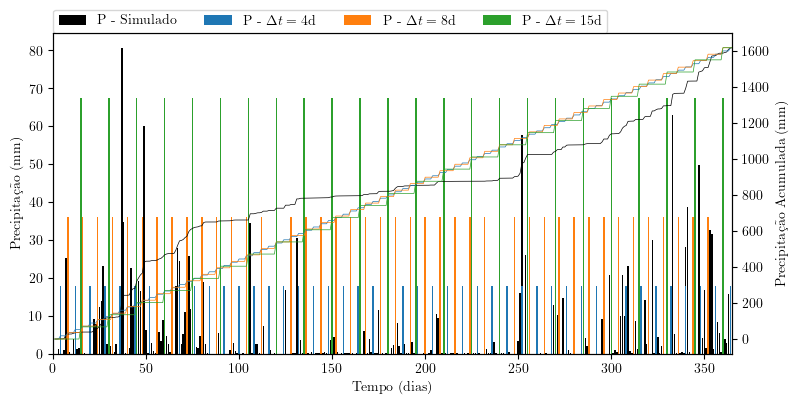

In [33]:
fig, ax = plt.subplots(figsize=(20/2.54, 10/2.54), constrained_layout=True)

x = [i + 1 for i in range(365)]

ax.bar(x, df['P'], label='P - Simulado', linewidth=0.5, color='black')
ax.bar(x, df['P4d'], label='P - $\Delta t = 4$d', linewidth=0.5)
ax.bar(x, df['P8d'], label='P - $\Delta t = 8$d', linewidth=0.5)
ax.bar(x, df['P15d'], label='P - $\Delta t = 15$d', linewidth=0.5)

ax2 = ax.twinx()

ax2.plot(x, df['P'].cumsum(), label='P Simulado', linewidth=0.5, color='black')
ax2.plot(x, df['P4d'].cumsum(), label='P - $\Delta t = 4$d', linewidth=0.5)
ax2.plot(x, df['P8d'].cumsum(), label='P - $\Delta t = 8$d', linewidth=0.5)
ax2.plot(x, df['P15d'].cumsum(), label='P - $\Delta t = 15$d', linewidth=0.5)

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Precipitação (mm)')
ax2.set_ylabel('Precipitação Acumulada (mm)')

ax.legend(ncol=4, loc=(0, 1.))





ax.set_xlim(0, 365)
ax.set_ylim(0)
plt.savefig('H:/GitHub/Thesis/images/analise/chuvas1.pdf')
plt.show()

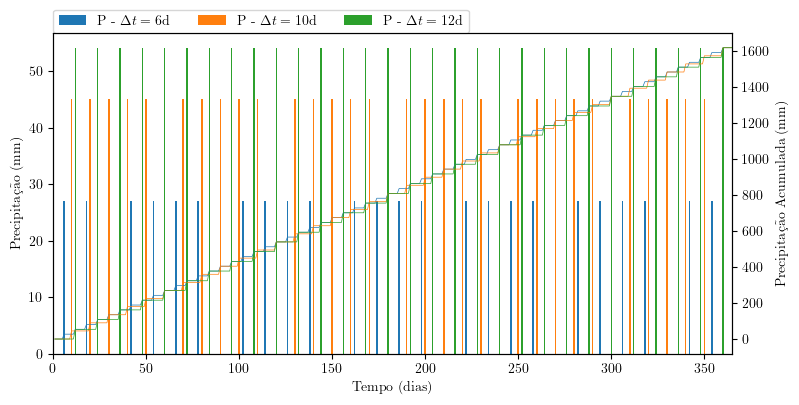

In [35]:
fig, ax = plt.subplots(figsize=(20/2.54, 10/2.54), constrained_layout=True)

x = [i + 1 for i in range(365)]

ax.bar(x, df['P6d'], label='P - $\Delta t = 6$d', linewidth=0.5)
ax.bar(x, df['P10d'], label='P - $\Delta t = 10$d', linewidth=0.5)
ax.bar(x, df['P12d'], label='P - $\Delta t = 12$d', linewidth=0.5)

ax2 = ax.twinx()

ax2.plot(x, df['P6d'].cumsum(), label='P - $\Delta t = 6$d', linewidth=0.5)
ax2.plot(x, df['P10d'].cumsum(), label='P - $\Delta t = 10$d', linewidth=0.5)
ax2.plot(x, df['P12d'].cumsum(), label='P - $\Delta t = 12$d', linewidth=0.5)

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Precipitação (mm)')
ax2.set_ylabel('Precipitação Acumulada (mm)')

ax.legend(ncol=4, loc=(0, 1.))


ax.set_xlim(0, 365)
ax.set_ylim(0)
plt.savefig('H:/GitHub/Thesis/images/analise/chuvas2.pdf')
plt.show()